# Abstract

Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. 
A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

# Relevant Info


Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

In [243]:
#Setting Environment

import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib notebook
mpl.get_backend()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [244]:
beans=pd.read_excel("Dry_Bean_Dataset.xlsx")             #reading the file

In [245]:
beans.head(10)                                           #analysing data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [246]:
#Cleaning (sort of!)

beans=beans.rename(columns={"AspectRation":"AspectRatio"})         
beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRatio      13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

Looks like no value is missing

In [247]:
grouped=beans.groupby("Class")
for clmn in list(beans.columns[:-1]) :
        print("\n......",clmn,".....\n")    
        print(grouped.describe()[clmn])
        
        


...... Area .....

           count           mean           std       min        25%       50%  \
Class                                                                          
BARBUNYA  1322.0   69804.133132  10265.386454   41487.0   62931.00   69582.0   
BOMBAY     522.0  173485.059387  23327.688116  114004.0  156711.25  171494.5   
CALI      1630.0   75538.211043   9379.881487   45504.0   69343.50   74791.5   
DERMASON  3546.0   32118.710942   4676.129470   20420.0   28549.25   31890.0   
HOROZ     1928.0   53648.508817   7341.397869   33006.0   48909.75   53800.5   
SEKER     2027.0   39881.299951   4779.877395   28395.0   36408.00   39180.0   
SIRA      2636.0   44729.128604   4546.769886   31519.0   41612.00   44593.0   

                75%       max  
Class                          
BARBUNYA   76306.50  115967.0  
BOMBAY    186599.00  254616.0  
CALI       81304.75  116272.0  
DERMASON   35581.00   42159.0  
HOROZ      58573.50   81929.0  
SEKER      42700.00   61150.0  
SIR

           count      mean       std       min       25%       50%       75%  \
Class                                                                          
BARBUNYA  1322.0  0.982804  0.004067  0.961840  0.980619  0.983086  0.985492   
BOMBAY     522.0  0.986902  0.005182  0.957261  0.984990  0.988137  0.990308   
CALI      1630.0  0.985021  0.005784  0.954616  0.981616  0.986235  0.989514   
DERMASON  3546.0  0.988226  0.002969  0.946634  0.987328  0.988717  0.989873   
HOROZ     1928.0  0.985480  0.006073  0.943559  0.984673  0.987018  0.988656   
SEKER     2027.0  0.990351  0.002993  0.919246  0.989487  0.990936  0.991938   
SIRA      2636.0  0.987971  0.002780  0.969256  0.986874  0.988516  0.989762   

               max  
Class               
BARBUNYA  0.992549  
BOMBAY    0.994677  
CALI      0.994378  
DERMASON  0.993629  
HOROZ     0.992798  
SEKER     0.994213  
SIRA      0.993076  

...... roundness .....

           count      mean       std       min       25%       50

<IPython.core.display.Javascript object>


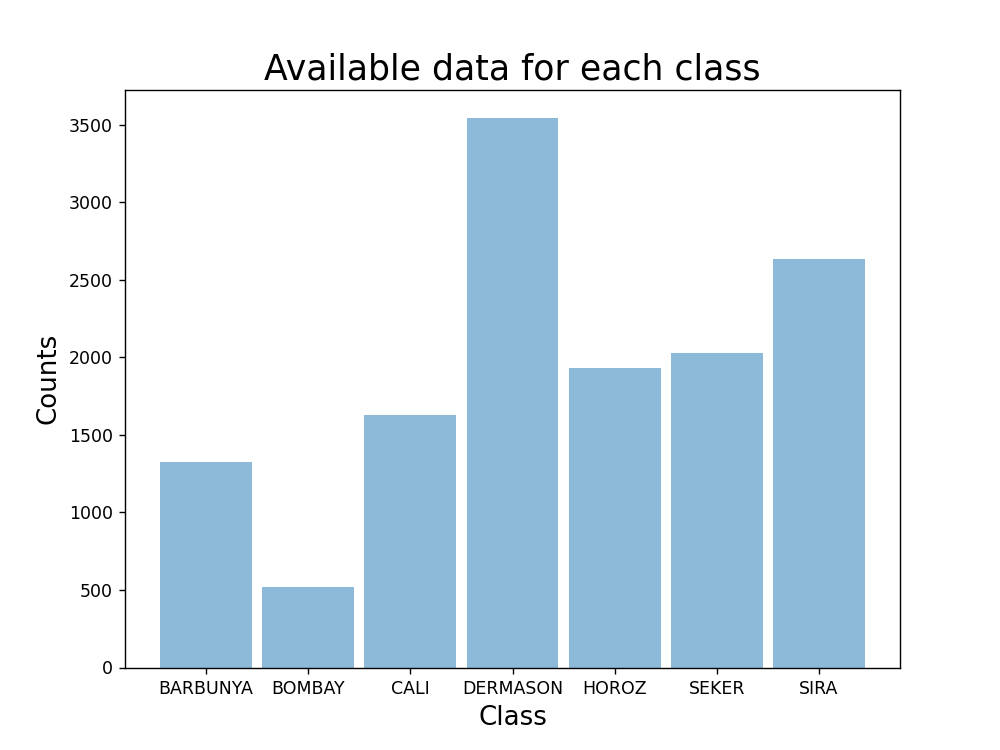

In [291]:
# counts 

plt.figure(figsize=(8,6))
plt.bar(grouped.describe()["Area"].index,grouped.describe()["Area"]["count"],width=0.9,alpha=0.5)
plt.xlabel("Class",fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.title("Available data for each class",fontsize=20)
fig1.show()
plt.savefig('Available_data.jpg')

DERMASON class has highest number of beans in the dataset while BOMBAY has the minimum

<IPython.core.display.Javascript object>


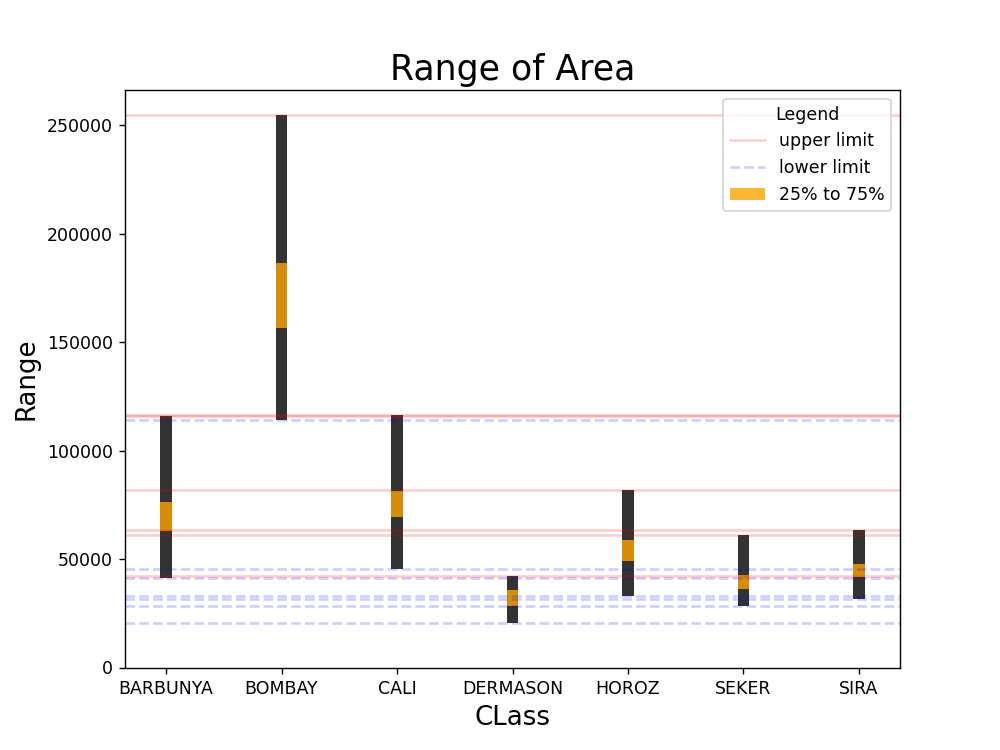

In [292]:
#Range for Area
n=len(df_Area.index)

df_Area=grouped.describe()["Area"]
df_Area["Range"]=df_Area["max"]-df_Area["min"]

plt.figure(figsize=(8,6))
plt.bar(df_Area.index,df_Area["Range"],bottom=df_Area["min"],width=0.1,
       color="black",alpha=0.8)
for i in range(n-1) :       
    plt.axhline(y=df_Area["max"][i], color='red', linestyle='-',alpha=0.2)

plt.axhline(y=df_Area["max"]["SIRA"], color='red', linestyle='-',alpha=0.2, label="upper limit")

for i in range(n-1) :       
    plt.axhline(y=df_Area["min"][i], color='blue', linestyle='--',alpha=0.2)
    
plt.axhline(y=df_Area["min"]["SIRA"], color='blue', linestyle='--',alpha=0.2 ,label="lower limit")



df_Area["Range2"]=df_Area["75%"]-df_Area["25%"]
plt.bar(df_Area.index,df_Area["Range2"],bottom=df_Area["25%"],width=0.1,
       color="orange",alpha=0.8 ,label="25% to 75%")



plt.xlabel("CLass",fontsize=15)
plt.ylabel("Range",fontsize=15)
plt.title("Range of Area",fontsize=20)
plt.ylim(0,)
plt.legend(title="Legend", loc=1)
plt.show()
plt.savefig('Range_Of_Area.jpg')

Clearly , we can see the BOMBAY beans have a kind of unique range on higher end 

<IPython.core.display.Javascript object>


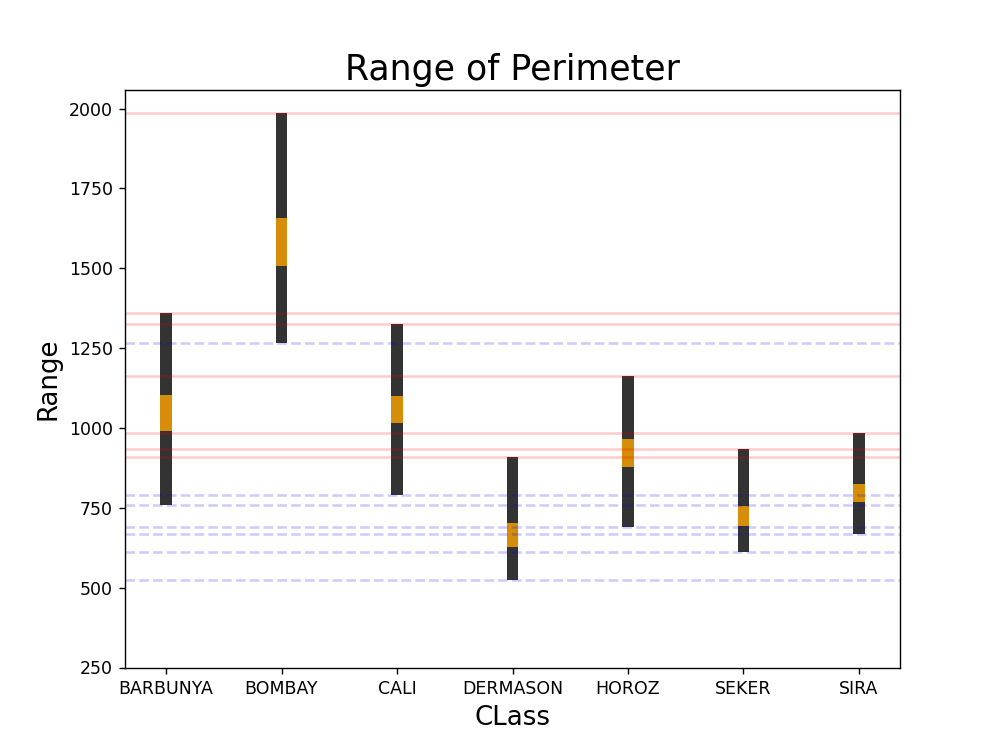

In [293]:
#Lets do the same for perimeter , major axis length & minor axis length

#perimeter
plt.figure(figsize=(8,6))

df_peri=grouped.describe()["Perimeter"]
df_peri["Range"]=df_peri["max"]-df_peri["min"]

plt.bar(df_peri.index,df_peri["Range"],bottom=df_peri["min"],width=0.1,
       color="black",alpha=0.8)
for i in range(n) :       
    plt.axhline(y=df_peri["max"][i], color='red', linestyle='-',alpha=0.2)

for i in range(n) :       
    plt.axhline(y=df_peri["min"][i], color='blue', linestyle='--',alpha=0.2)

df_peri["Range2"]=df_peri["75%"]-df_peri["25%"]
plt.bar(df_peri.index,df_peri["Range2"],bottom=df_peri["25%"],width=0.1,
       color="orange",alpha=0.8 ,label="25% to 75%")
    
plt.xlabel("CLass",fontsize=15)
plt.ylabel("Range",fontsize=15)
plt.title("Range of Perimeter",fontsize=20)
plt.ylim(250,)
plt.show()

plt.savefig('Range_Of_Perimeter.jpg')

<IPython.core.display.Javascript object>


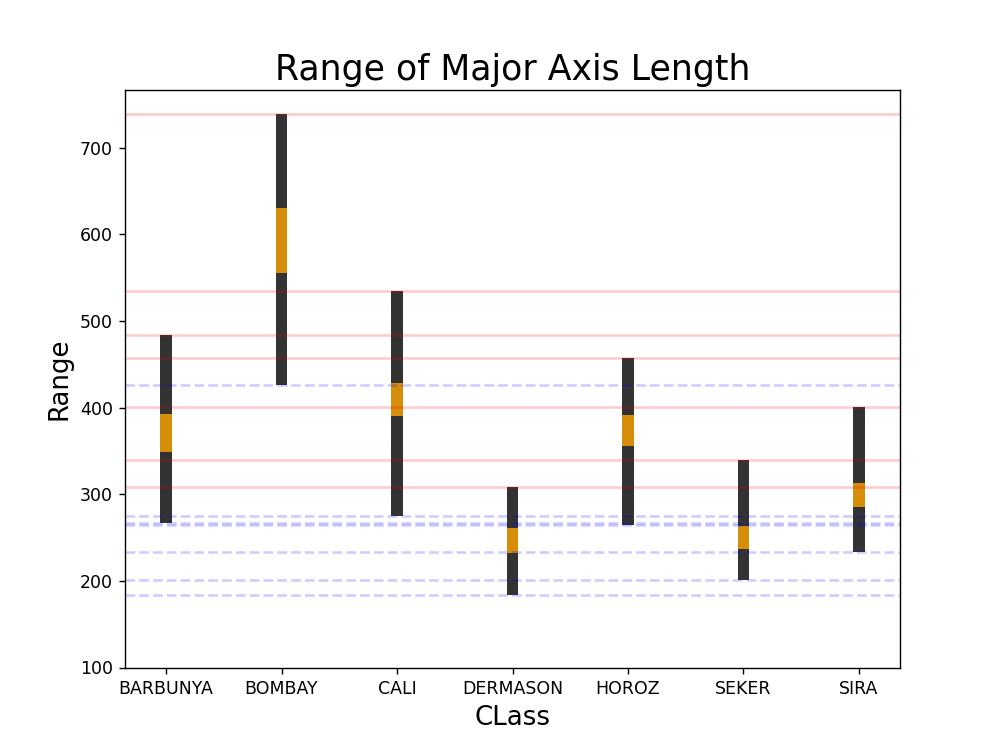

In [294]:
#major axis length
plt.figure(figsize=(8,6))
df_maj=grouped.describe()["MajorAxisLength"]
df_maj["Range"]=df_maj["max"]-df_maj["min"]

plt.bar(df_maj.index,df_maj["Range"],bottom=df_maj["min"],width=0.1,
       color="black",alpha=0.8)
for i in range(n) :       
    plt.axhline(y=df_maj["max"][i], color='red', linestyle='-',alpha=0.2)

for i in range(n) :       
    plt.axhline(y=df_maj["min"][i], color='blue', linestyle='--',alpha=0.2)

df_maj["Range2"]=df_maj["75%"]-df_maj["25%"]
plt.bar(df_maj.index,df_maj["Range2"],bottom=df_maj["25%"],width=0.1,
       color="orange",alpha=0.8 ,label="25% to 75%")

plt.xlabel("CLass",fontsize=15)
plt.ylabel("Range",fontsize=15)
plt.title("Range of Major Axis Length",fontsize=20)
plt.ylim(100,)
plt.show()

plt.savefig('Range_Of_Major Axis length.jpg')

<IPython.core.display.Javascript object>


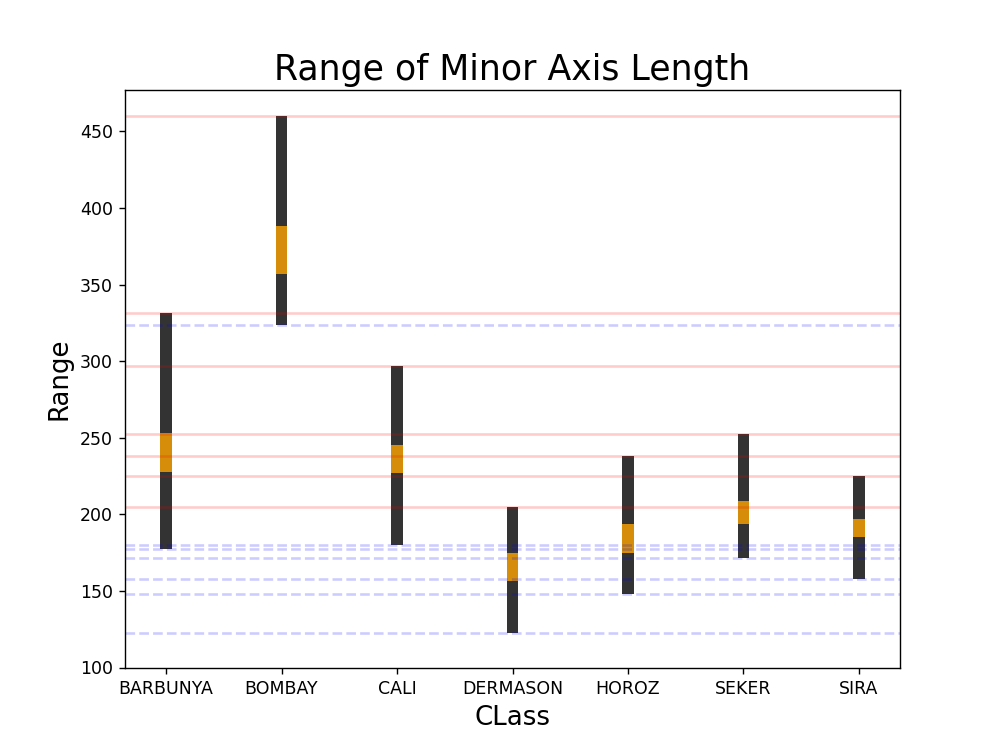

In [295]:
#minor axis length
plt.figure(figsize=(8,6))
df_min=grouped.describe()["MinorAxisLength"]
df_min["Range"]=df_min["max"]-df_min["min"]

plt.bar(df_min.index,df_min["Range"],bottom=df_min["min"],width=0.1,
       color="black",alpha=0.8)
for i in range(n) :       
    plt.axhline(y=df_min["max"][i], color='red', linestyle='-',alpha=0.2)

for i in range(n) :       
    plt.axhline(y=df_min["min"][i], color='blue', linestyle='--',alpha=0.2)

df_min["Range2"]=df_min["75%"]-df_min["25%"]
plt.bar(df_min.index,df_min["Range2"],bottom=df_min["25%"],width=0.1,
       color="orange",alpha=0.8 ,label="25% to 75%")
    
plt.xlabel("CLass",fontsize=15)
plt.ylabel("Range",fontsize=15)
plt.title("Range of Minor Axis Length",fontsize=20)
plt.ylim(100,)
plt.show()

plt.savefig('Range_Of_Minor Axis Length.jpg')

These graphs confirm that size of BOMBAY has a higher size

<IPython.core.display.Javascript object>


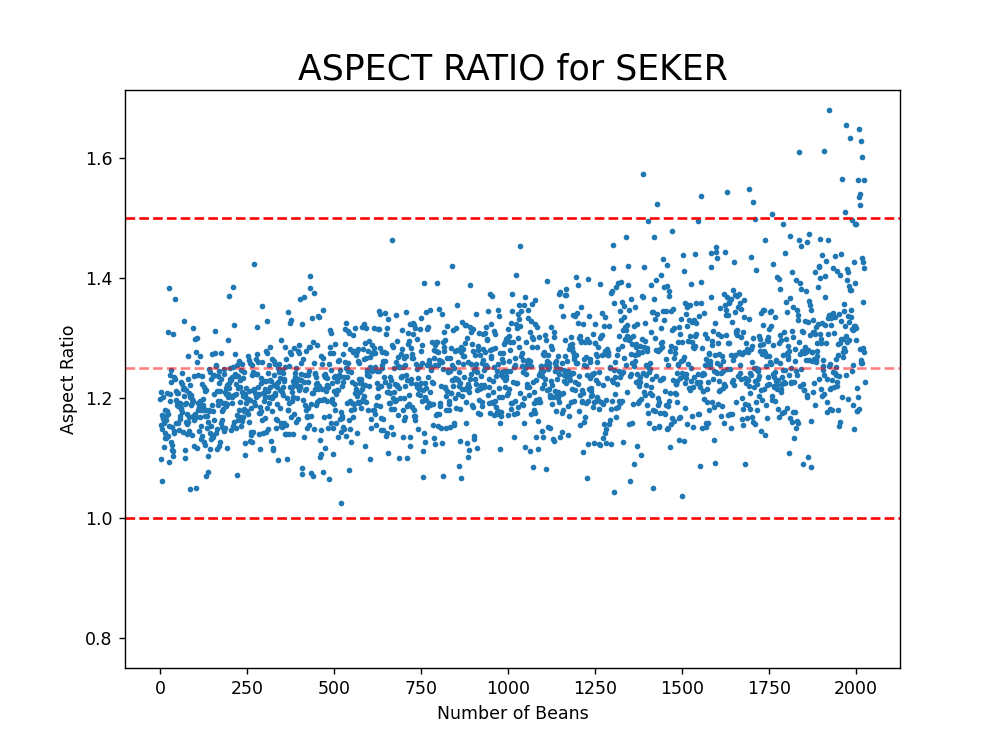

<ipython-input-296-df2f0b0a6105>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


<IPython.core.display.Javascript object>


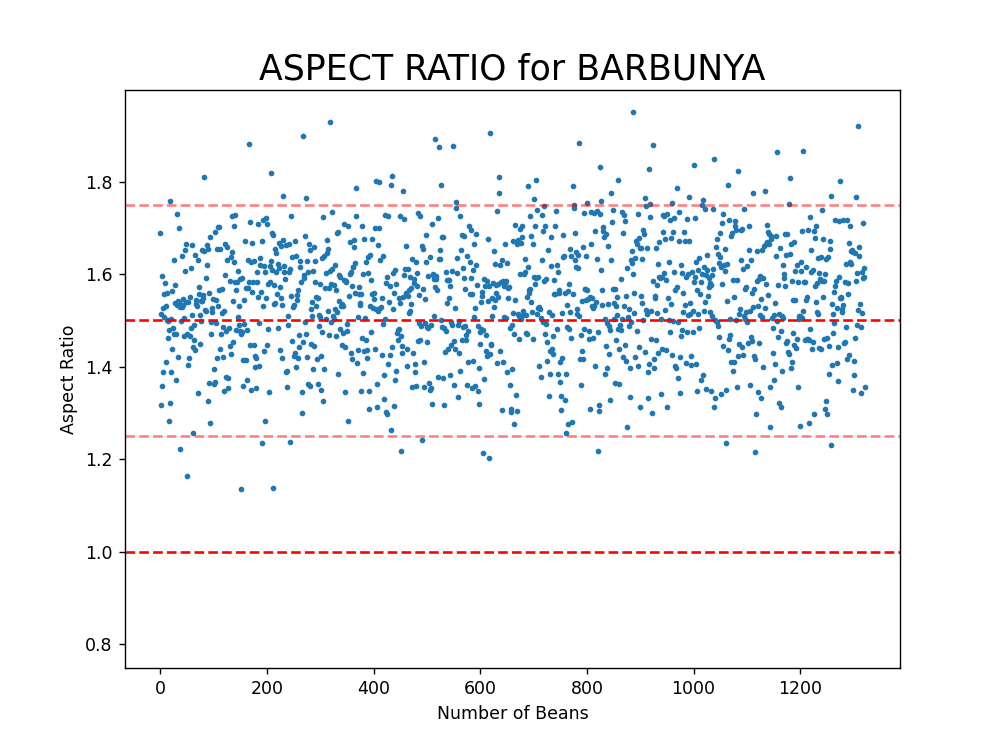

<IPython.core.display.Javascript object>


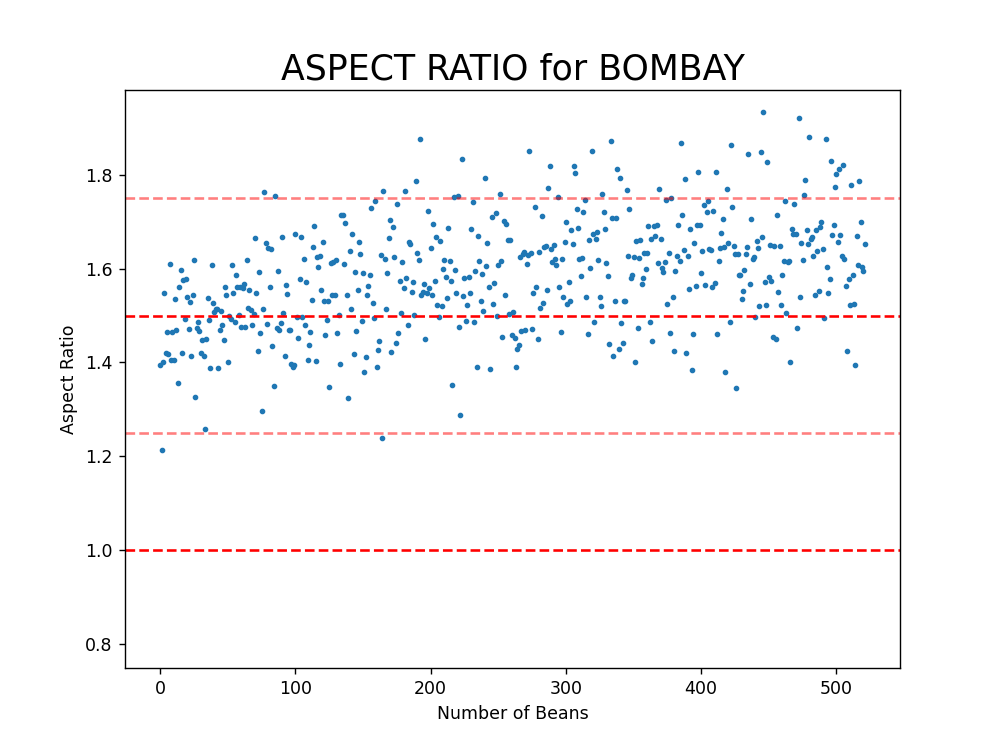

<IPython.core.display.Javascript object>


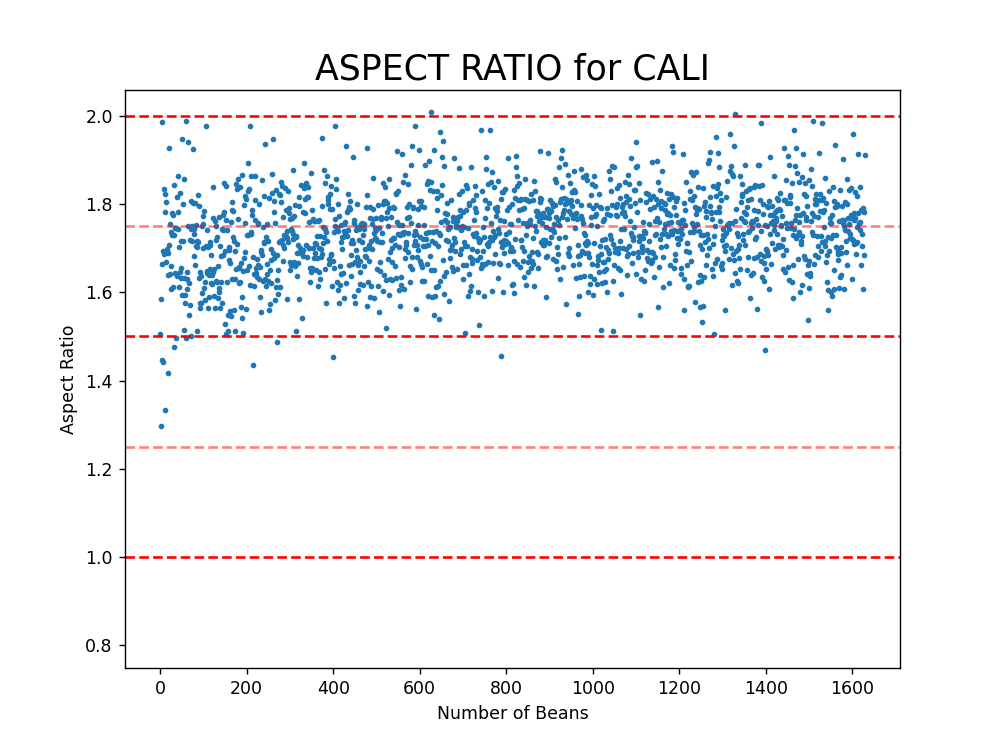

<IPython.core.display.Javascript object>


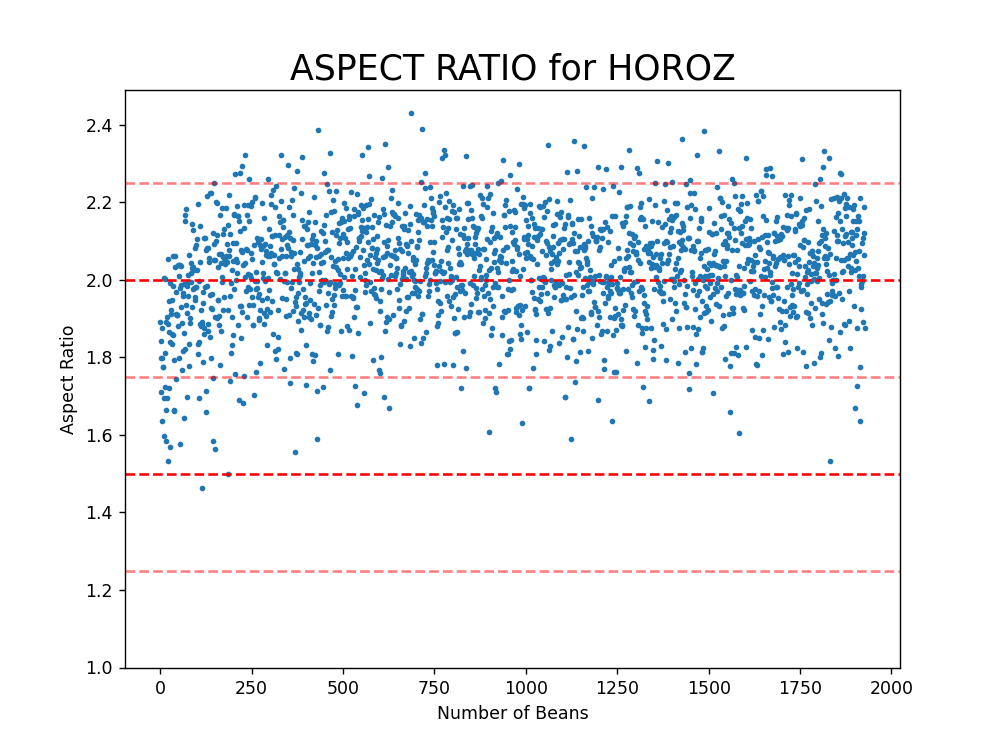

<IPython.core.display.Javascript object>


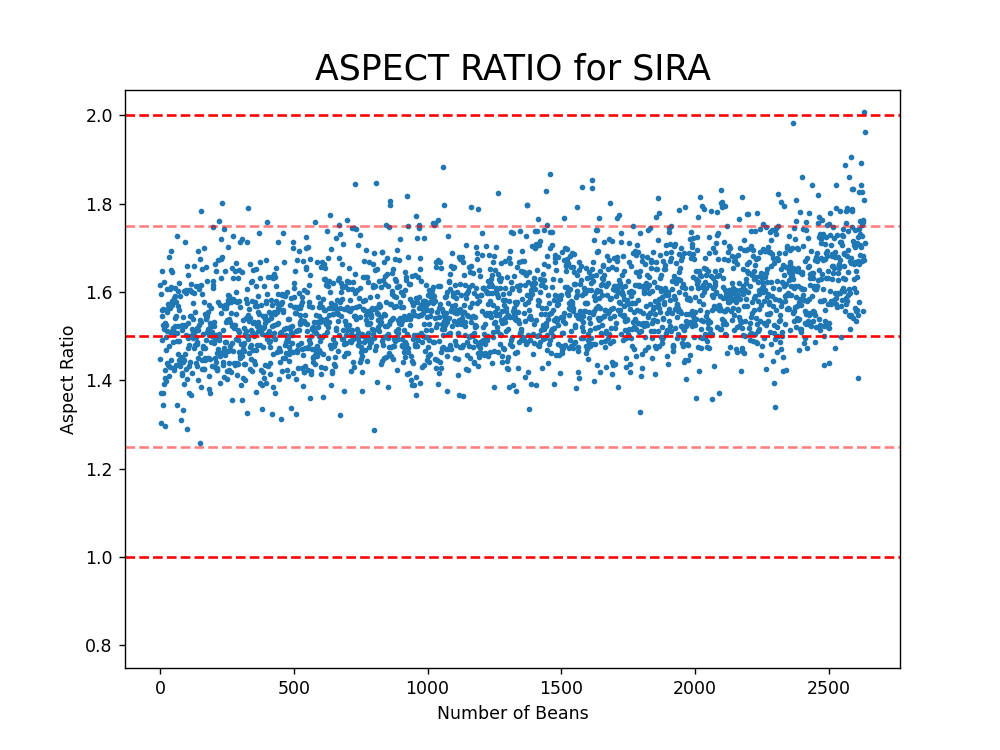

<IPython.core.display.Javascript object>


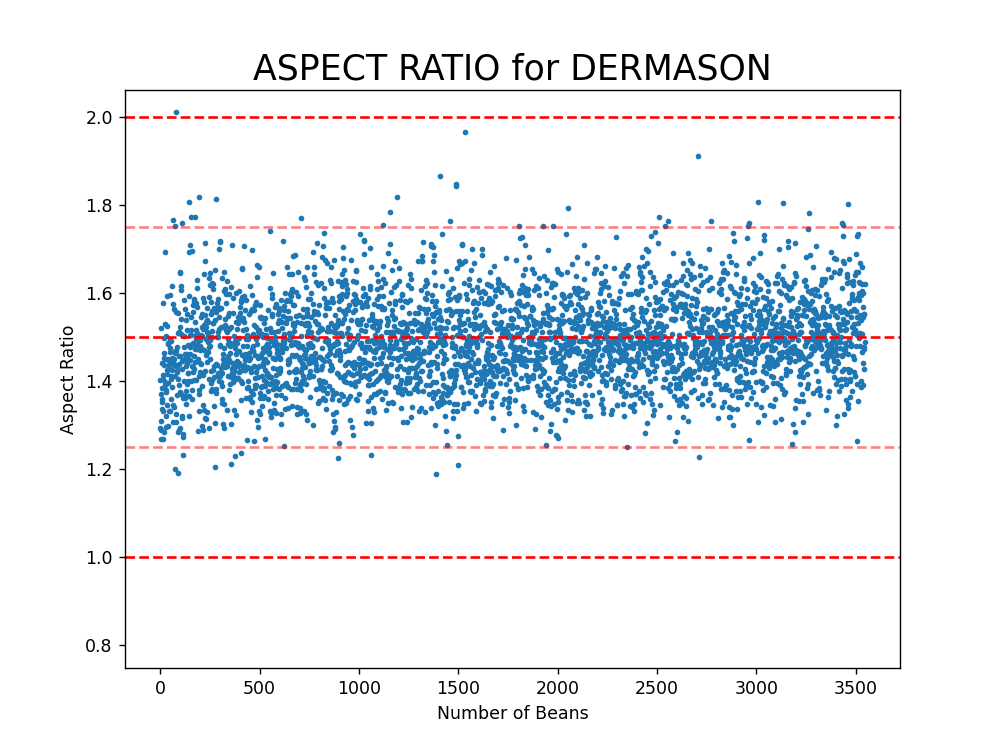

In [296]:
df=beans[["AspectRatio","Class"]]
for clss in list(beans["Class"].unique()) :
    plt.figure(figsize=(8,6))
    plt.scatter(range(len(df[df["Class"]==clss])),df[df["Class"]==clss]["AspectRatio"],s=5)
    if clss!="HOROZ" :    
        plt.axhline(y=1, color='red', linestyle='--')
        plt.ylim(0.75,)
    plt.axhline(y=1.25, color='red', linestyle='--',alpha=0.5)
    plt.axhline(y=1.5, color='red', linestyle='--')
    plt.axhline(y=1.75, color='red', linestyle='--',alpha=0.5)
    plt.axhline(y=2, color='red', linestyle='--')
    if clss=="HOROZ" :
        plt.axhline(y=2.25, color='red', linestyle='--',alpha=0.5)
        plt.ylim(1,)
    plt.xlabel("Number of Beans")
    string="ASPECT RATIO for "+str(clss)
    plt.ylabel("Aspect Ratio")
    plt.title(string, fontsize=20)
    plt.show()
    tit="Aspect Ratio-"+clss+".jpg"
    plt.savefig(tit)

It is clear that the aspect ratio for HOROZ class is comparitively higher than others

<IPython.core.display.Javascript object>


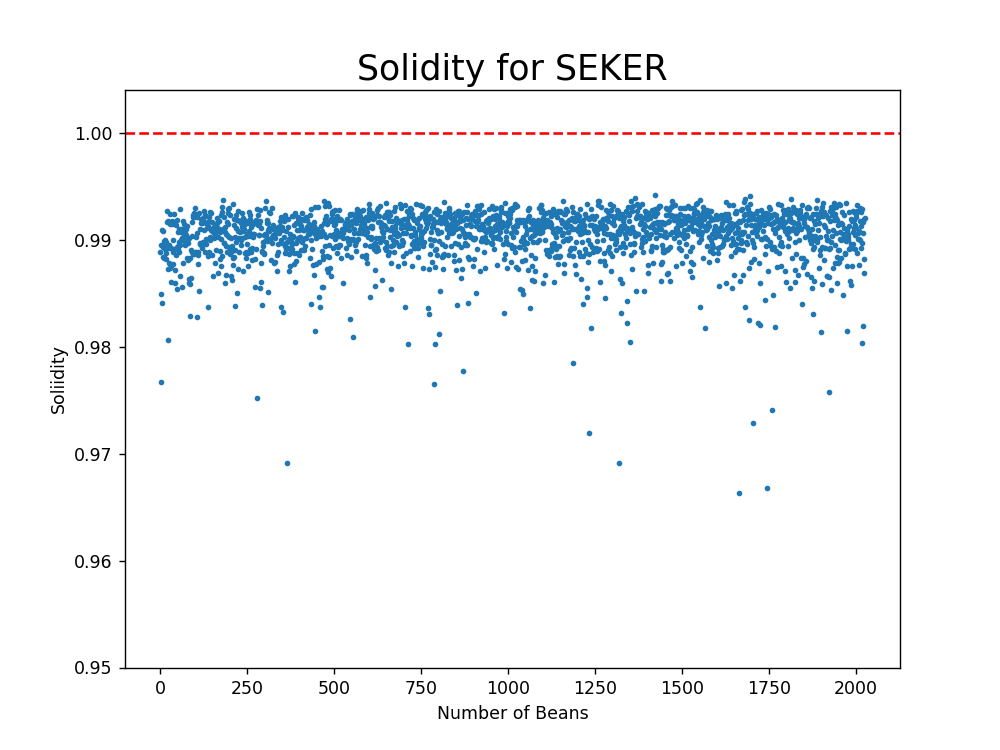

<ipython-input-297-ef4bc4823082>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


<IPython.core.display.Javascript object>


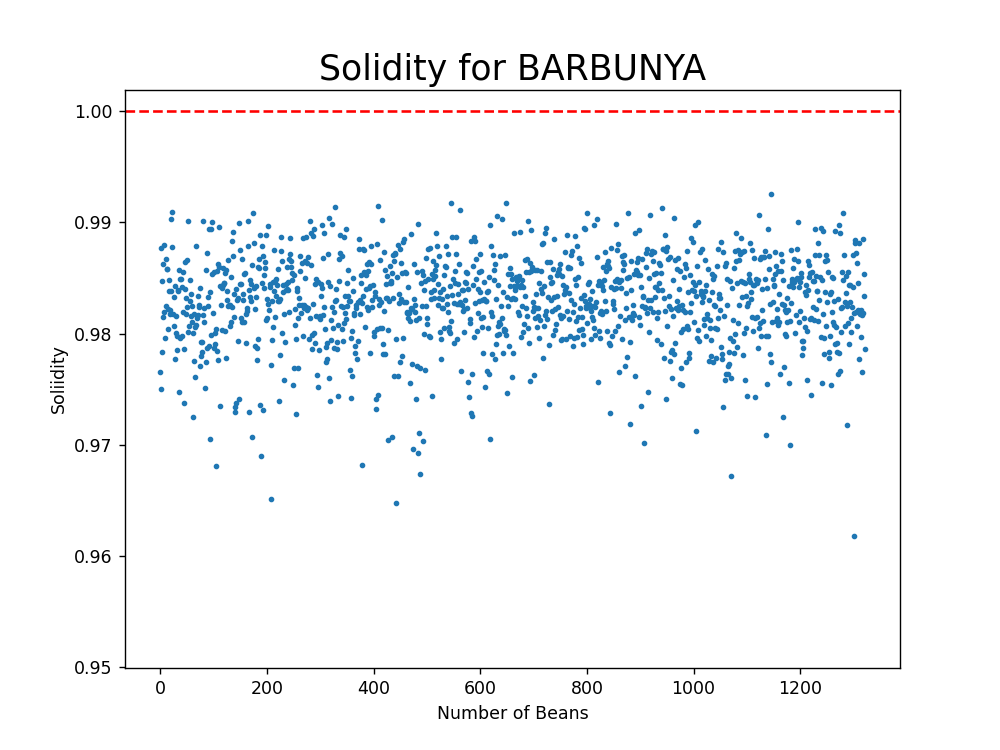

<IPython.core.display.Javascript object>


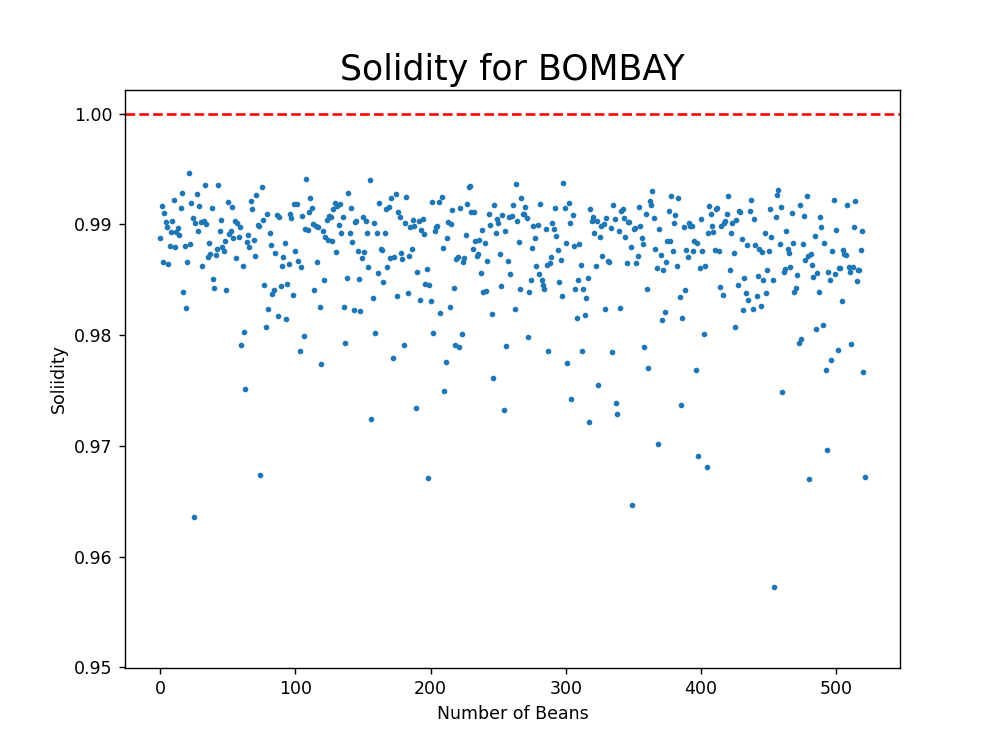

<IPython.core.display.Javascript object>


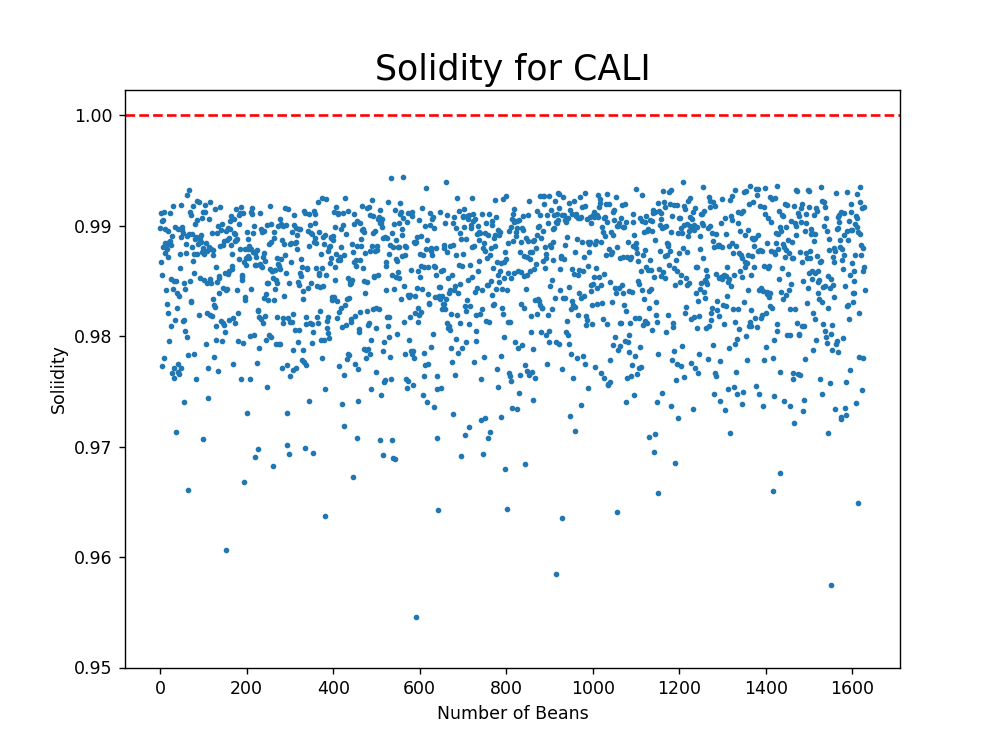

<IPython.core.display.Javascript object>


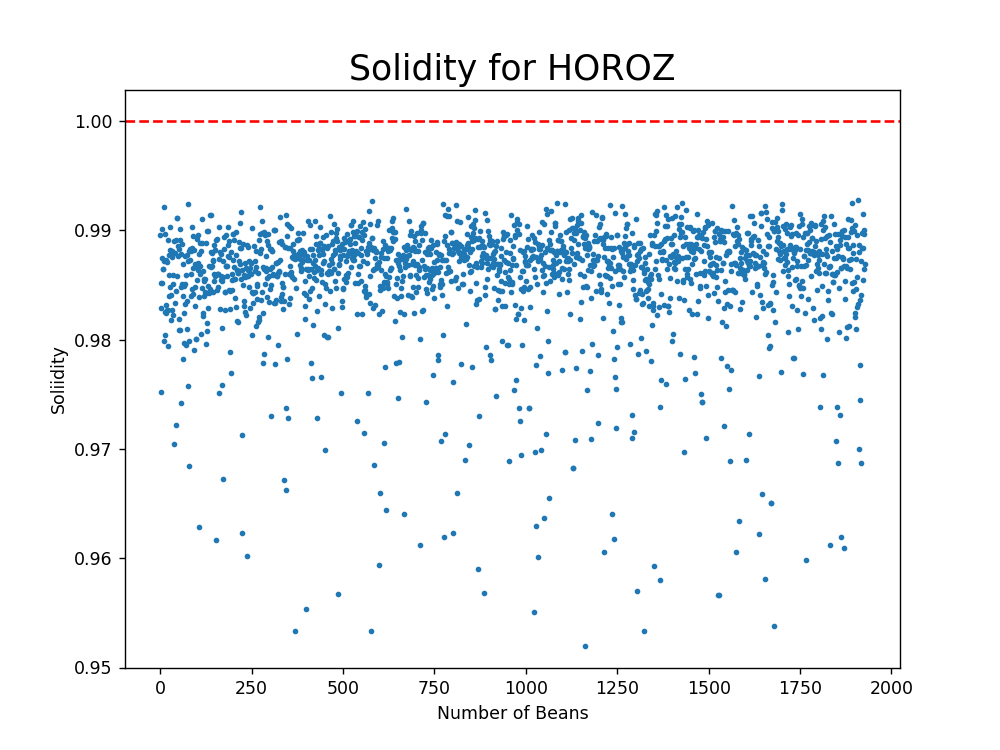

<IPython.core.display.Javascript object>


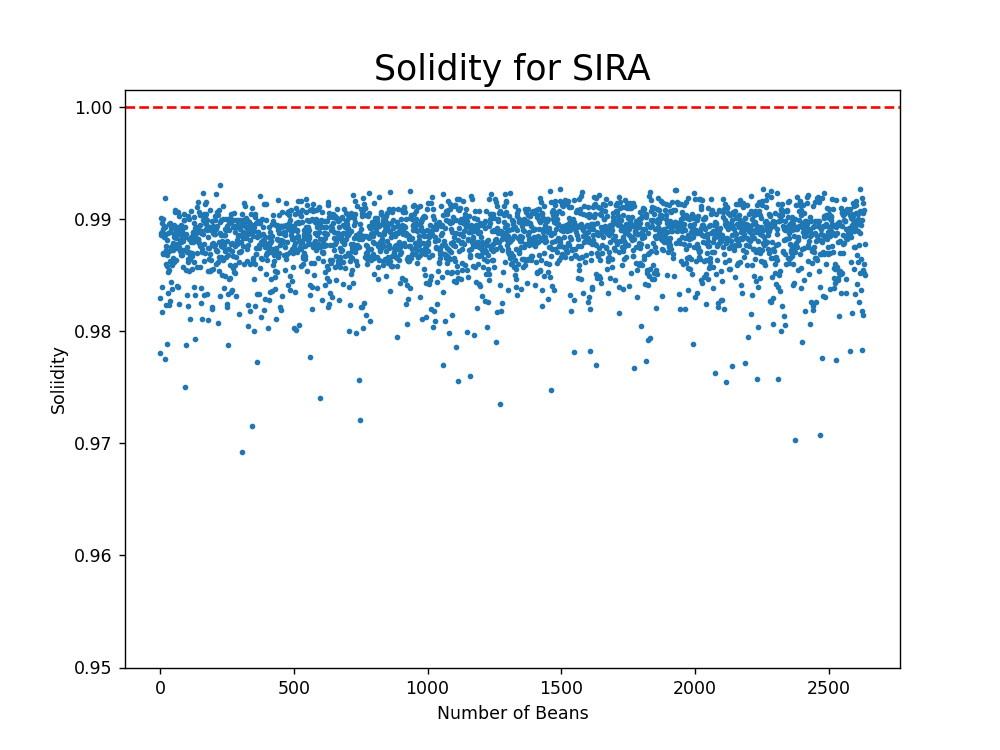

<IPython.core.display.Javascript object>


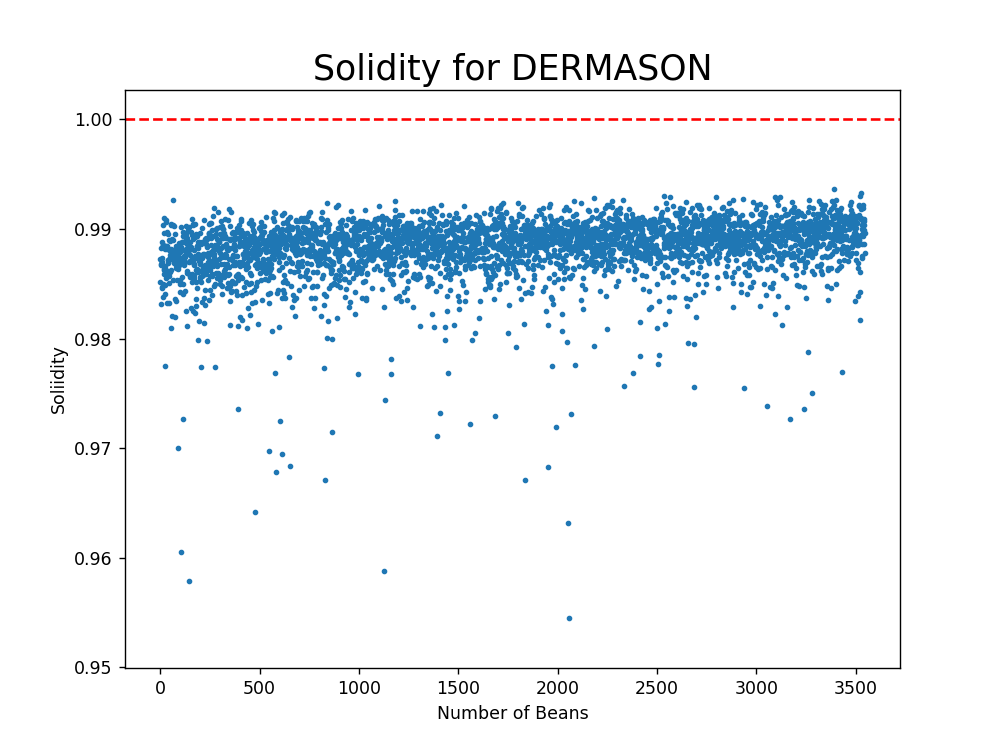

In [297]:
df2=beans[["Solidity","Class"]]
for clss in list(beans["Class"].unique()) :
    plt.figure(figsize=(8,6))
    plt.scatter(range(len(df2[df2["Class"]==clss])),df2[df2["Class"]==clss]["Solidity"],s=5)
    plt.axhline(y=1, color='red', linestyle='--')
    
    
    plt.ylim(0.95,)
    plt.xlabel("Number of Beans")
    string="Solidity for "+str(clss)
    plt.ylabel("Soliidity")
    plt.title(string, fontsize=20)
    plt.show()
    tit="Solidity-"+clss+".jpg"
    plt.savefig(tit)

<IPython.core.display.Javascript object>


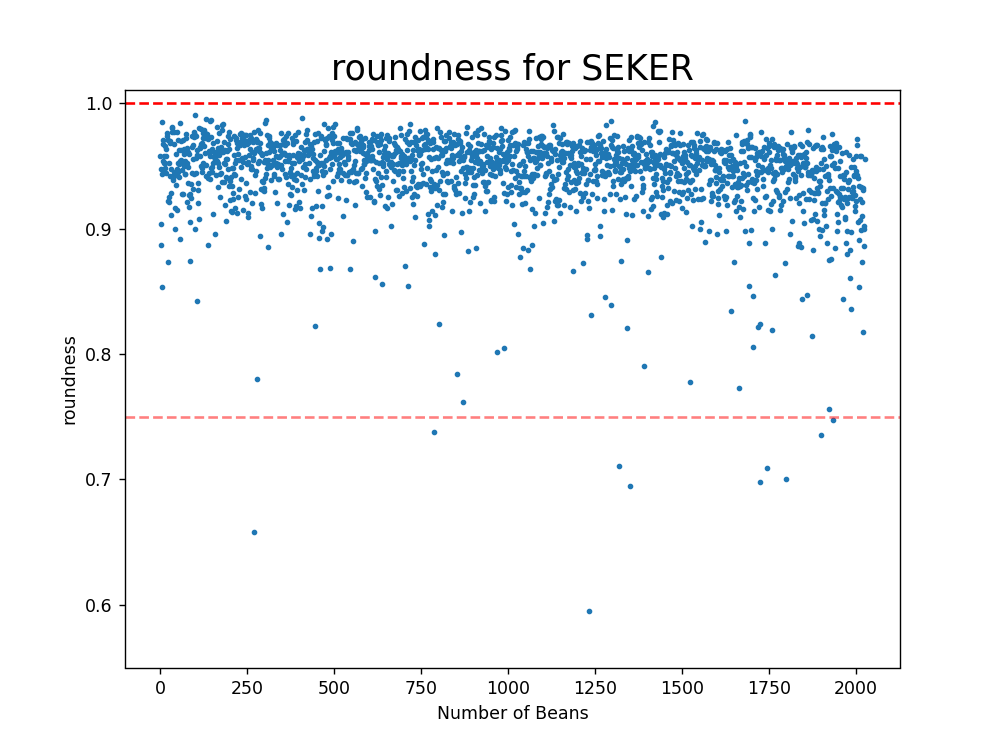

<ipython-input-298-e28c176ac4c8>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,6))


<IPython.core.display.Javascript object>


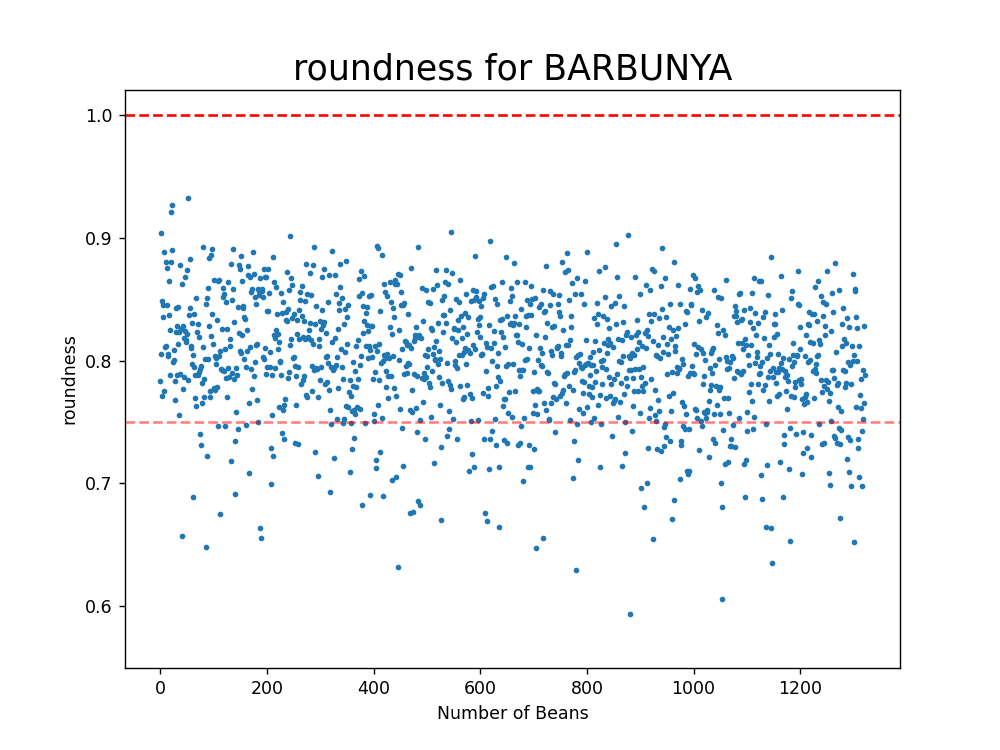

<IPython.core.display.Javascript object>


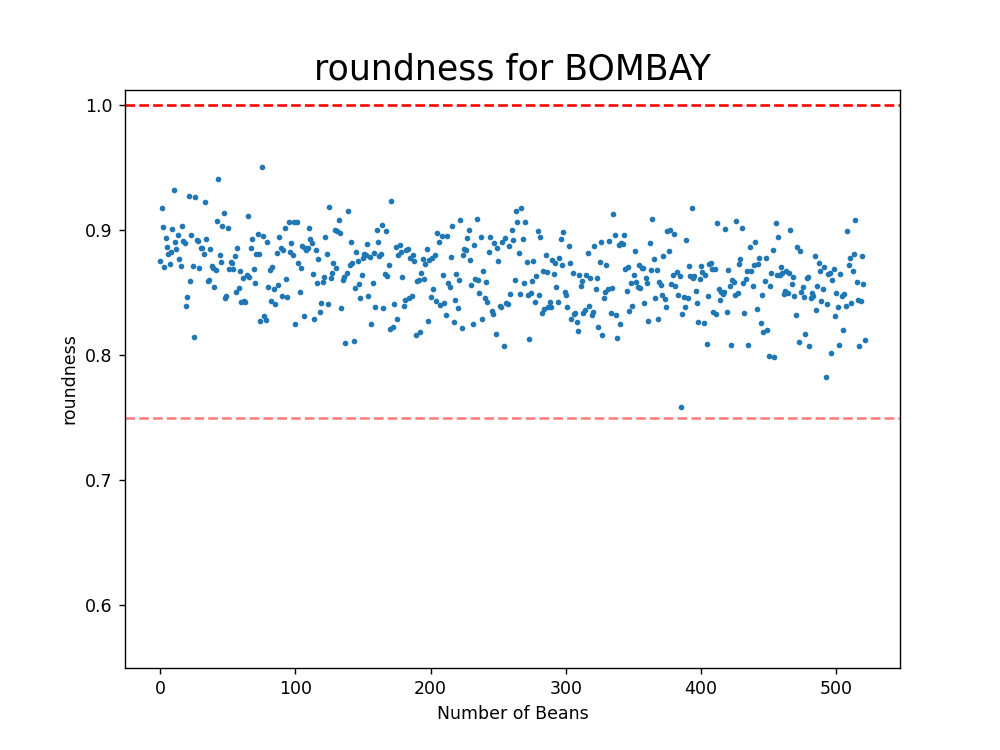

<IPython.core.display.Javascript object>


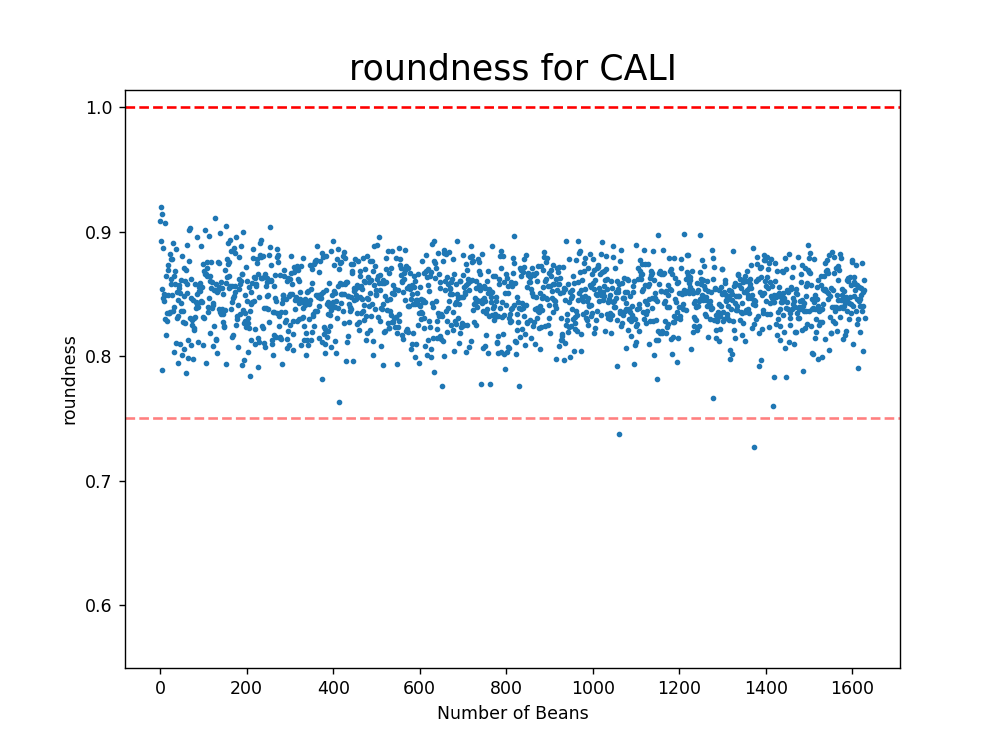

<IPython.core.display.Javascript object>


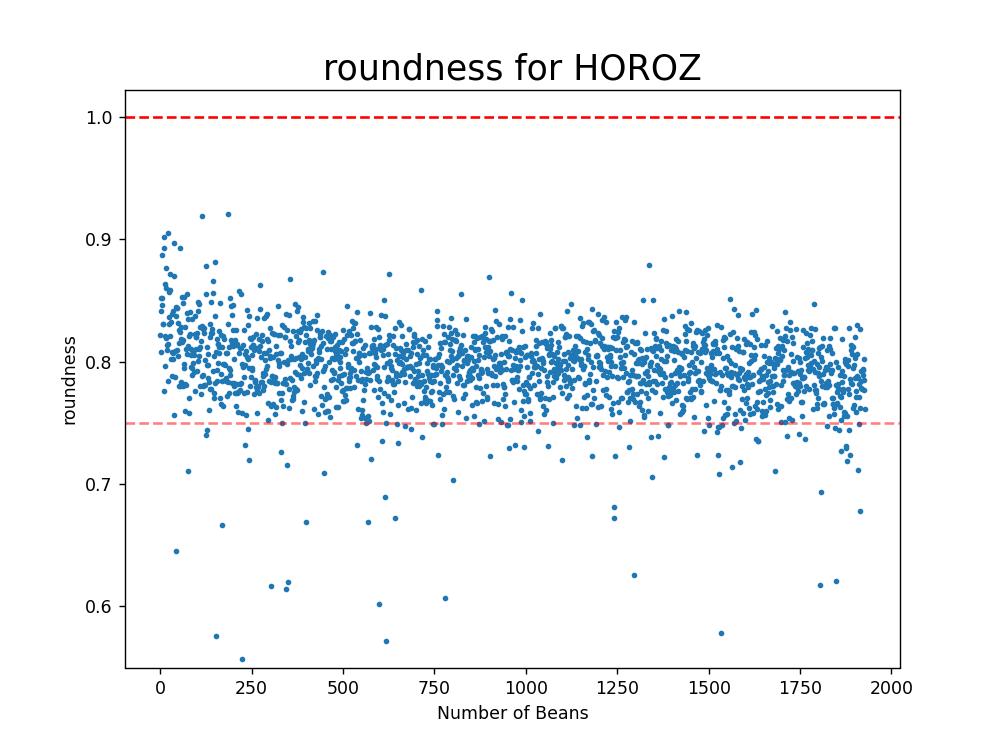

<IPython.core.display.Javascript object>


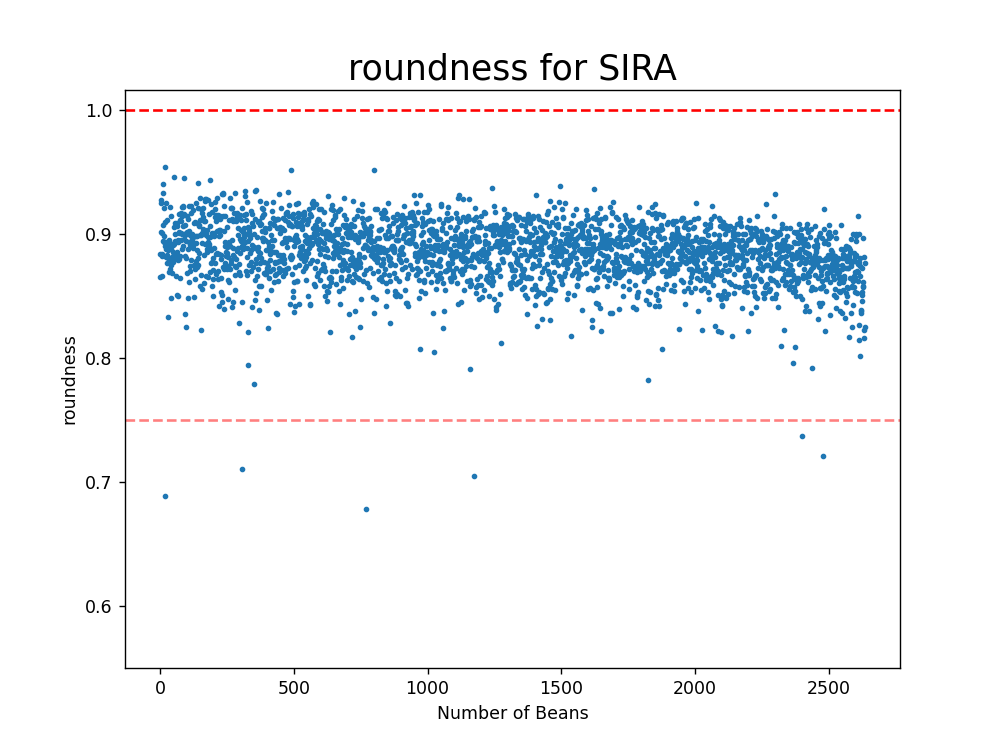

<IPython.core.display.Javascript object>


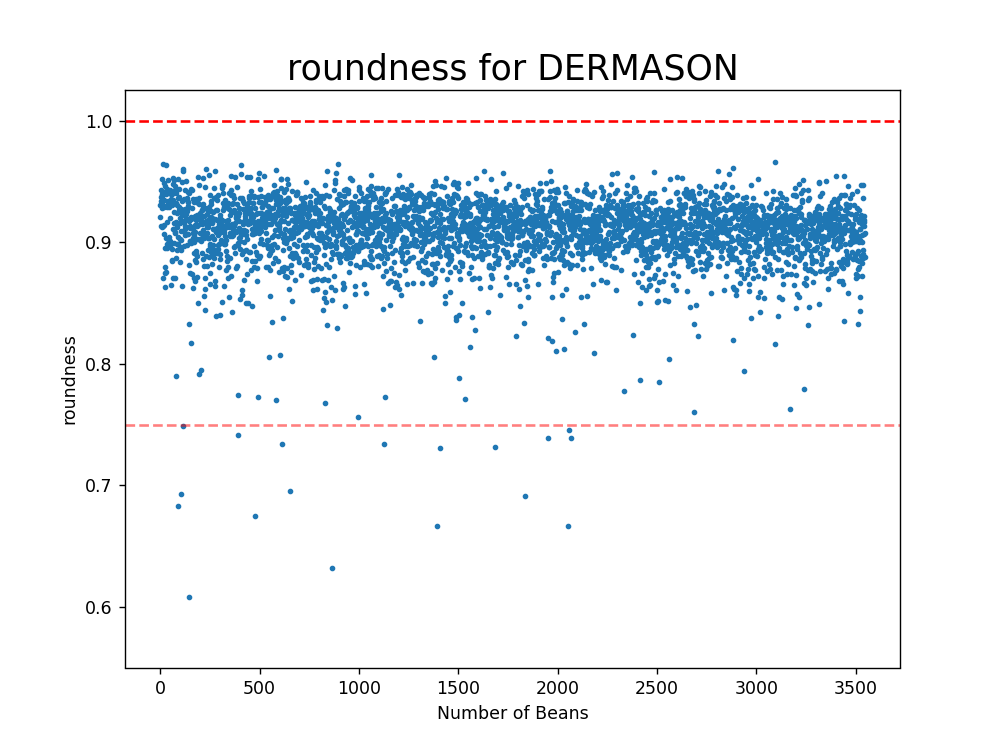

In [298]:
df3=beans[["roundness","Class"]]
for clss in list(beans["Class"].unique()) :
    plt.figure(figsize=(8,6))
    plt.scatter(range(len(df3[df3["Class"]==clss])),df3[df3["Class"]==clss]["roundness"],s=5)
    plt.axhline(y=1, color='red', linestyle='--')
    plt.axhline(y=0.75, color='red', linestyle='--',alpha=0.5)
    
    plt.ylim(0.55,)
    plt.xlabel("Number of Beans")
    string="roundness for "+str(clss)
    plt.ylabel("roundness")
    plt.title(string, fontsize=20)
    plt.show()
    tit="roundness-"+clss+".jpg"
    plt.savefig(tit)

Other parameters can be used to do the machine learning process

# Supervised Classification 

using Decision Tree here

In [282]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train ,X_test ,Y_train, Y_test= train_test_split(beans[['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRatio',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4']],beans["Class"],random_state=0)

DTree_model = DecisionTreeClassifier()


In [287]:
DTree_model.fit(X_train, Y_train)
acc_DTree = DTree_model.score(X_test,Y_test)



print('Accuracy :', acc_DTree,'\n')

Accuracy : 0.8942109903026741 



Pretty happy with that accuracy! 89.4%

# Project by : Aditya yadav 
 Enrollment no. :19113009 , Phone number : 9057618985 (Whatsapp) & 6396290138
 


Helped by : Stackoverflow & DSG notebook